<a href="https://colab.research.google.com/github/maitreyee-github/AI-Learning/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

In [3]:
import numpy as np
import builtins
#builtins.dict_keys
from _collections_abc import dict_keys
#dict_keys = dict_keys[]
#instanceof(d.keys(), collections.KeysView)
#isinstance(d.keys(), collections.abc.KeysView)


from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
#dict_keys(['data','target','feature_names','DESCR','details','categories','url'])


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
#X, y = mnist["data"], mnist["target"]
#print(dict_keys[0][0])
#X.shape
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Extract data and target
X, y = mnist["data"], mnist["target"]

# Inspect the keys of the dataset
print(mnist.keys())  # This shows available keys

# Access and print specific information if needed
print(X.shape)  # Prints the shape of the feature matrix
print(y[0])     # Example of accessing the first target value

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
(70000, 784)
5


In [5]:
y.shape

(70000,)

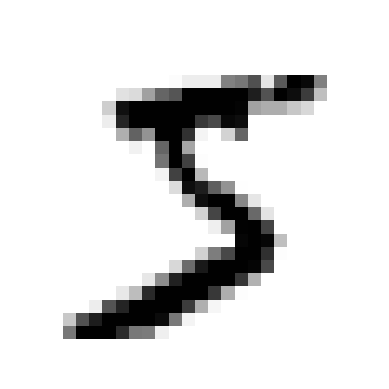

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Assume X is already loaded and properly structured (e.g., from MNIST dataset)
# Ensure X is a NumPy array
some_digit = X[0]  # Access the first digit
some_digit_image = some_digit.reshape(28, 28)  # Reshape to 28x28

# Plot the digit image
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")  # Turn off axis for better visualization

# Save the figure (define your own save location)
plt.savefig("some_digit_plot.png", format="png", dpi=300)

# Display the image
plt.show()

In [7]:
y[0]

'5'

In [8]:
y = y.astype(np.uint8)

Let's create a Test & Train set . Total dataset contains 70,000 images, of which I am splitting first 60,000 images as training set & remaining 10,000 images as test set. 

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Training Binary classifier : 

In [12]:
y_train_5 = (y_train == 5) # true for all 5(s) & false otherwise
y_test_5 = (y_test == 5 )

Let's pick a classifier SGD ( Stochastic Gradient Desscent)

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

Performance Measures

Measuring accuracy using cross validation

Implmenting Cross validation 

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Initialize StratifiedKFold
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Iterate through the folds
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # Clone the classifier
    clone_clf = clone(sgd_clf)
    
    # Split the data into training and testing folds
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    # Fit the model and make predictions
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    
    # Compute accuracy
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


Let's use the cross_val_score() function to evaluate SGDClassifier model.

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])